<a href="https://colab.research.google.com/github/sadrasa97/harmony-algorithm-on-accounting-dataset/blob/main/Copy_of_accounting111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import library

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


##Load data

In [5]:
data=pd.read_excel('/content/drive/MyDrive/brain/Book1.xlsx')

In [6]:
data.head()

,نوع تقلب,TTM حاشیه سود ناخالص,TTM حاشیه سود عملیاتی,TTM حاشیه سود خالص,بازده دارایی ها,بازده حقوق صاحبان سهام,نسبت سود قبل از بهره و مالیات به دارایی,گردش دارایی ها,گردش دارایی های ثابت,گردش موجودی کالا,...,نسبت جاری,نسبت آنی,نسبت وجه نقد آزاد شرکت به درآمد,نسبت مخارج سرمایه ای به درآمد,نسبت مخارج سرمایه ای به سود خالص,نسبت وجه نقد عملیاتی به درآمد,نسبت وجه نقد عملیاتی به جمع بدهی ها,lnارزش بنگاه,ln ارزش دفتری,نسبت سود انباشته به سرمایه
0,0,0.582093,0.501455,0.358882,0.371861,0.741187,0.519590,1.036165,10.814166,2.086131,...,2.226474,1.754499,0.114428,0.030563,0.085161,0.215282,0.447665,8.875946,7.434141,0.232229
1,0,0.492433,0.451322,0.337339,0.366580,0.814248,0.490443,1.086682,8.491659,2.575991,...,2.195339,1.586813,0.106138,-0.022750,-0.067439,0.129388,0.255740,8.401437,6.890452,0.918832
2,0,0.557478,0.525283,0.380916,0.340370,0.660544,0.469370,0.893557,10.085534,2.559817,...,2.262109,1.887961,0.110138,0.028599,0.075078,0.217758,0.401432,9.097349,7.726064,0.631981
3,0,0.511608,0.429650,0.305953,0.338004,0.700335,0.474660,1.104760,10.633818,2.372203,...,2.094392,1.588643,0.107178,0.025981,0.084920,0.197794,0.422358,8.311043,7.101099,0.941283
4,0,0.339710,0.301482,0.222834,0.322690,0.863989,0.436581,1.448119,12.689330,3.910963,...,1.541700,1.165829,-0.054035,0.023677,0.106254,0.011558,0.026716,7.113497,5.517529,0.917903


In [7]:
data.describe()

,نوع تقلب,TTM حاشیه سود ناخالص,TTM حاشیه سود عملیاتی,TTM حاشیه سود خالص,بازده دارایی ها,بازده حقوق صاحبان سهام,نسبت سود قبل از بهره و مالیات به دارایی,گردش دارایی ها,گردش دارایی های ثابت,گردش موجودی کالا,...,نسبت جاری,نسبت آنی,نسبت وجه نقد آزاد شرکت به درآمد,نسبت مخارج سرمایه ای به درآمد,نسبت مخارج سرمایه ای به سود خالص,نسبت وجه نقد عملیاتی به درآمد,نسبت وجه نقد عملیاتی به جمع بدهی ها,lnارزش بنگاه,ln ارزش دفتری,نسبت سود انباشته به سرمایه
count,1799.000000,1798.000000,1798.000000,1798.000000,1799.000000,1797.000000,1799.000000,1799.000000,1799.000000,1798.000000,...,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1759.000000,1732.000000,1799.000000
mean,0.897165,0.261090,0.423137,0.419342,0.147423,0.571425,0.173087,1.014041,6.777085,3.925101,...,1.431314,0.929370,0.239485,0.159885,0.713870,0.034386,0.183166,16.704705,9.146694,0.898515
std,1.189025,0.169941,10.180077,10.573126,0.168102,17.498913,0.166203,0.638999,8.248901,4.361457,...,1.194197,0.994119,6.660626,4.300038,5.739692,3.537983,1.111505,273.595106,108.172956,4.971218
min,0.000000,-1.837481,-2.310295,-1.460853,-0.454636,-118.850923,-0.530026,-0.121742,-0.458307,-13.121153,...,0.006874,0.063690,-3.293138,-2.685406,-71.317406,-149.610291,-44.274305,-0.487760,-23.686878,-101.000000
25%,0.000000,0.141179,0.068555,0.041248,0.039113,0.122763,0.065501,0.612031,2.084507,1.848895,...,0.951554,0.553630,-0.005569,0.009939,0.047595,0.023697,0.039068,6.458241,5.277720,0.019268
50%,0.000000,0.242532,0.158735,0.125508,0.112949,0.308526,0.140964,0.869703,4.415713,2.731675,...,1.265081,0.804213,0.058849,0.025182,0.180583,0.102993,0.146784,7.461248,6.257685,0.300928
75%,1.000000,0.362728,0.295051,0.261718,0.229115,0.580305,0.248757,1.226581,8.213620,4.549952,...,1.635518,1.077947,0.160826,0.063031,0.459081,0.206768,0.313191,8.980317,7.281266,0.940642
max,5.000000,0.981911,431.756329,448.314618,0.944607,722.876534,0.950794,5.626519,125.686659,84.334961,...,27.095449,26.455246,282.376669,182.252664,122.978389,2.090260,3.500686,9742.017000,4496.996000,147.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   نوع تقلب                                 1799 non-null   int64  
 1   TTM حاشیه سود ناخالص                     1798 non-null   float64
 2   TTM حاشیه سود عملیاتی                    1798 non-null   float64
 3   TTM حاشیه سود خالص                       1798 non-null   float64
 4   بازده دارایی ها                          1799 non-null   float64
 5   بازده حقوق صاحبان سهام                   1797 non-null   float64
 6   نسبت سود قبل از بهره و مالیات به دارایی  1799 non-null   float64
 7   گردش دارایی ها                           1799 non-null   float64
 8   گردش دارایی های ثابت                     1799 non-null   float64
 9   گردش موجودی کالا                         1798 non-null   float64
 10  گردش حساب های دریافتنی                   1799 no

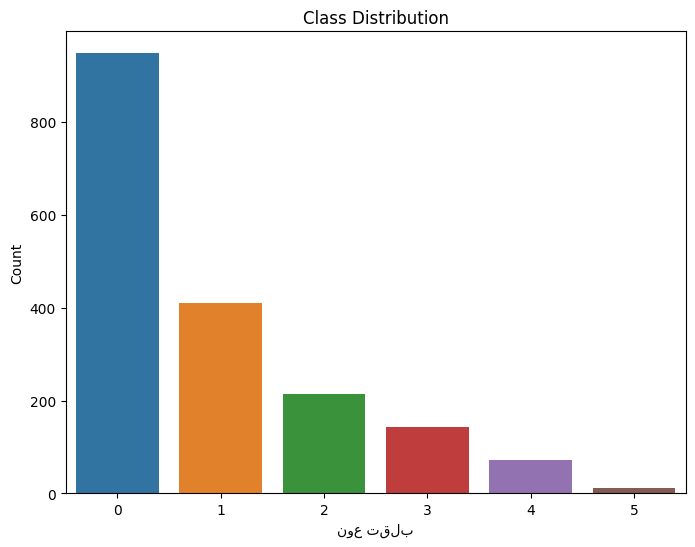

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='نوع تقلب')
plt.title('Class Distribution')
plt.xlabel('نوع تقلب')
plt.ylabel('Count')
plt.show()

In [8]:
#sns.pairplot(data)
#plt.show()

In [9]:
#fig, ax = plt.subplots(figsize=(25, 22))

#sns.heatmap(data.corr(), ax=ax, annot=True)

##Pre processing data

In [10]:
data= data.dropna()
data.head()

,نوع تقلب,TTM حاشیه سود ناخالص,TTM حاشیه سود عملیاتی,TTM حاشیه سود خالص,بازده دارایی ها,بازده حقوق صاحبان سهام,نسبت سود قبل از بهره و مالیات به دارایی,گردش دارایی ها,گردش دارایی های ثابت,گردش موجودی کالا,...,نسبت جاری,نسبت آنی,نسبت وجه نقد آزاد شرکت به درآمد,نسبت مخارج سرمایه ای به درآمد,نسبت مخارج سرمایه ای به سود خالص,نسبت وجه نقد عملیاتی به درآمد,نسبت وجه نقد عملیاتی به جمع بدهی ها,lnارزش بنگاه,ln ارزش دفتری,نسبت سود انباشته به سرمایه
0,0,0.582093,0.501455,0.358882,0.371861,0.741187,0.519590,1.036165,10.814166,2.086131,...,2.226474,1.754499,0.114428,0.030563,0.085161,0.215282,0.447665,8.875946,7.434141,0.232229
1,0,0.492433,0.451322,0.337339,0.366580,0.814248,0.490443,1.086682,8.491659,2.575991,...,2.195339,1.586813,0.106138,-0.022750,-0.067439,0.129388,0.255740,8.401437,6.890452,0.918832
2,0,0.557478,0.525283,0.380916,0.340370,0.660544,0.469370,0.893557,10.085534,2.559817,...,2.262109,1.887961,0.110138,0.028599,0.075078,0.217758,0.401432,9.097349,7.726064,0.631981
3,0,0.511608,0.429650,0.305953,0.338004,0.700335,0.474660,1.104760,10.633818,2.372203,...,2.094392,1.588643,0.107178,0.025981,0.084920,0.197794,0.422358,8.311043,7.101099,0.941283
4,0,0.339710,0.301482,0.222834,0.322690,0.863989,0.436581,1.448119,12.689330,3.910963,...,1.541700,1.165829,-0.054035,0.023677,0.106254,0.011558,0.026716,7.113497,5.517529,0.917903


In [11]:
X = data.drop('نوع تقلب', axis=1)
y = data['نوع تقلب']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
y_test

634     3
1575    3
119     3
142     1
355     0
       ..
1250    2
110     1
1058    1
1780    0
1417    2
Name: نوع تقلب, Length: 344, dtype: int64

In [16]:
k = 25
harmony_memory_size = 100
max_iterations = 30

class HarmonySearchClassifier:
    def __init__(self, k, harmony_memory_size, max_iterations):
        self.k = k
        self.harmony_memory_size = harmony_memory_size
        self.max_iterations = max_iterations

    def fit(self, X, y):
        harmony_memory = np.random.randint(0, 2, size=(self.harmony_memory_size, X.shape[1]))

        for iteration in range(self.max_iterations):
            harmony_fitness = []
            for harmony in harmony_memory:
                knn = KNeighborsClassifier(n_neighbors=self.k)
                knn.fit(X_train[:, harmony == 1], y_train)
                y_pred = knn.predict(X_test[:, harmony == 1])
                f1 = f1_score(y_test, y_pred, average='macro')
                harmony_fitness.append(f1)

            best_harmony_idx = np.argmax(harmony_fitness)
            self.best_harmony = harmony_memory[best_harmony_idx]  # save the best harmony to the instance

            for i in range(self.harmony_memory_size):
                for j in range(X.shape[1]):
                    if np.random.rand() < 0.5:
                        harmony_memory[i, j] = self.best_harmony[j]

        best_knn = KNeighborsClassifier(n_neighbors=self.k)
        best_knn.fit(X_train[:, self.best_harmony == 1], y_train)

        self.model = best_knn

    def predict(self, X):
        return self.model.predict(X[:, self.best_harmony == 1])

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        return accuracy, precision, recall, f1

harmony_search = HarmonySearchClassifier(k, harmony_memory_size, max_iterations)
harmony_search.fit(X_train, y_train)

y_pred_knn = harmony_search.predict(X_test)


harmony_search = HarmonySearchClassifier(k, harmony_memory_size, max_iterations)
harmony_search.fit(X_train, y_train)

accuracy, precision, recall, f1 = harmony_search.evaluate(X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.5494186046511628
Precision: 0.43226795803066986
F1 Score: 0.24468304519259929


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
k = 25
harmony_memory_size =100
max_iterations = 30
class HarmonySearchClassifier:
    def __init__(self, k, harmony_memory_size, max_iterations):
        self.k = k
        self.harmony_memory_size = harmony_memory_size
        self.max_iterations = max_iterations

    def fit(self, X, y):
        harmony_memory = np.random.randint(0, 2, size=(self.harmony_memory_size, X.shape[1]))

        for iteration in range(self.max_iterations):
            harmony_fitness = []
            for harmony in harmony_memory:
                knn = KNeighborsClassifier(n_neighbors=self.k)
                knn.fit(X_train[:, harmony == 1], y_train)
                y_pred = knn.predict(X_test[:, harmony == 1])
                f1 = f1_score(y_test, y_pred, average='macro')
                harmony_fitness.append(f1)

            best_harmony_idx = np.argmax(harmony_fitness)
            self.best_harmony = harmony_memory[best_harmony_idx]  # save the best harmony to the instance

            indices = np.random.choice(range(self.harmony_memory_size), 2, replace=False)
            winner_idx = indices[0] if harmony_fitness[indices[0]] > harmony_fitness[indices[1]] else indices[1]

            for j in range(X.shape[1]):
                if np.random.rand() < 0.5:
                    harmony_memory[winner_idx, j] = self.best_harmony[j]

        best_knn = KNeighborsClassifier(n_neighbors=self.k)
        best_knn.fit(X_train[:, self.best_harmony == 1], y_train)

        self.model = best_knn
    def predict(self, X):
        return self.model.predict(X[:, self.best_harmony == 1])

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        return accuracy, precision, recall, f1
harmony_search = HarmonySearchClassifier(k, harmony_memory_size, max_iterations)
harmony_search.fit(X_train, y_train)

accuracy, precision, recall, f1 = harmony_search.evaluate(X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.5406976744186046
Precision: 0.3682484651498736
F1 Score: 0.23260169557439525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.svm import SVC
harmony_memory_size = 100
max_iterations = 30
class HarmonySearchSVM:
    def __init__(self, harmony_memory_size, max_iterations, C=1.0, kernel='linear'):
        self.harmony_memory_size = harmony_memory_size
        self.max_iterations = max_iterations
        self.C = C
        self.kernel = kernel

    def fit(self, X, y):
        harmony_memory = np.random.randint(0, 2, size=(self.harmony_memory_size, X.shape[1]))

        for iteration in range(self.max_iterations):
            harmony_fitness = []
            for harmony in harmony_memory:
                svm = SVC(C=self.C, kernel=self.kernel)
                svm.fit(X_train[:, harmony == 1], y_train)
                y_pred = svm.predict(X_test[:, harmony == 1])
                f1 = f1_score(y_test, y_pred, average='macro')
                harmony_fitness.append(f1)

            best_harmony_idx = np.argmax(harmony_fitness)
            self.best_harmony = harmony_memory[best_harmony_idx]

            for i in range(self.harmony_memory_size):
                for j in range(X.shape[1]):
                    if np.random.rand() < 0.5:
                        harmony_memory[i, j] = self.best_harmony[j]

        best_svm = SVC(C=self.C, kernel=self.kernel)
        best_svm.fit(X_train[:, self.best_harmony == 1], y_train)

        self.model = best_svm

    def predict(self, X):
        return self.model.predict(X[:, self.best_harmony == 1])

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        return accuracy, precision, recall, f1

harmony_search_svm = HarmonySearchSVM(harmony_memory_size, max_iterations)
harmony_search_svm.fit(X_train, y_train)

accuracy, precision, recall, f1 = harmony_search_svm.evaluate(X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.5116279069767442
Precision: 0.10232558139534884
F1 Score: 0.13538461538461538


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def create_complex_ann(input_dim, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_dim=input_dim),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

class HarmonySearchClassifier:
    def __init__(self, harmony_memory_size, max_iterations):
        self.harmony_memory_size = harmony_memory_size
        self.max_iterations = max_iterations

    def fit(self, X, y):
        harmony_memory = np.random.randint(0, 2, size=(self.harmony_memory_size, X.shape[1]))

        for iteration in range(self.max_iterations):
            harmony_fitness = []
            for harmony in harmony_memory:
                selected_features = X[:, harmony == 1]
                ann = create_complex_ann(selected_features.shape[1], num_classes)
                ann.fit(selected_features, y, epochs=epochs, verbose=0)
                y_pred_prob = ann.predict(selected_features)
                y_pred = np.argmax(y_pred_prob, axis=1)
                f1 = f1_score(y, y_pred, average='macro')
                harmony_fitness.append(f1)

            best_harmony_idx = np.argmax(harmony_fitness)
            self.best_harmony = harmony_memory[best_harmony_idx]

            indices = np.random.choice(range(self.harmony_memory_size), 2, replace=False)
            winner_idx = indices[0] if harmony_fitness[indices[0]] > harmony_fitness[indices[1]] else indices[1]

            for j in range(input_dim):
                if np.random.rand() < 0.5:
                    harmony_memory[winner_idx, j] = self.best_harmony[j]

        selected_features = X[:, self.best_harmony == 1]
        self.model = create_complex_ann(selected_features.shape[1], num_classes)
        self.model.fit(selected_features, y, epochs=epochs, verbose=0)

    def predict(self, X):
        selected_features = X[:, self.best_harmony == 1]
        return np.argmax(self.model.predict(selected_features), axis=1)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        cm = confusion_matrix(y, y_pred)
        return accuracy, precision, recall, f1, cm

input_dim = X_train.shape[1]
num_classes = 6
epochs = 30

harmony_memory_size =30
max_iterations = 20
harmony_search = HarmonySearchClassifier(harmony_memory_size, max_iterations)
harmony_search.fit(X_train, y_train)

accuracy, precision, recall, f1, confusion_matrix = harmony_search.evaluate(X_test, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_matrix)


11/11 [==============================] - 0s 2ms/step
Accuracy: 0.5145348837209303
Precision: 0.16419161676646707
F1 Score: 0.15026369168356998
Confusion Matrix:
[[174   2   0   0   0]
 [ 74   3   0   0   0]
 [ 45   2   0   0   0]
 [ 24   3   0   0   0]
 [ 17   0   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
